In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv(r"D:\Download\archive (2)/house_price_regression_dataset.csv")

df.head()


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [ ]:
 # missing value

In [2]:
missing_values = df.isnull().sum()
missing_values


Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [ ]:
# Visualize missing data patterns (Bar Chart)

IndexError: index 0 is out of bounds for axis 0 with size 0

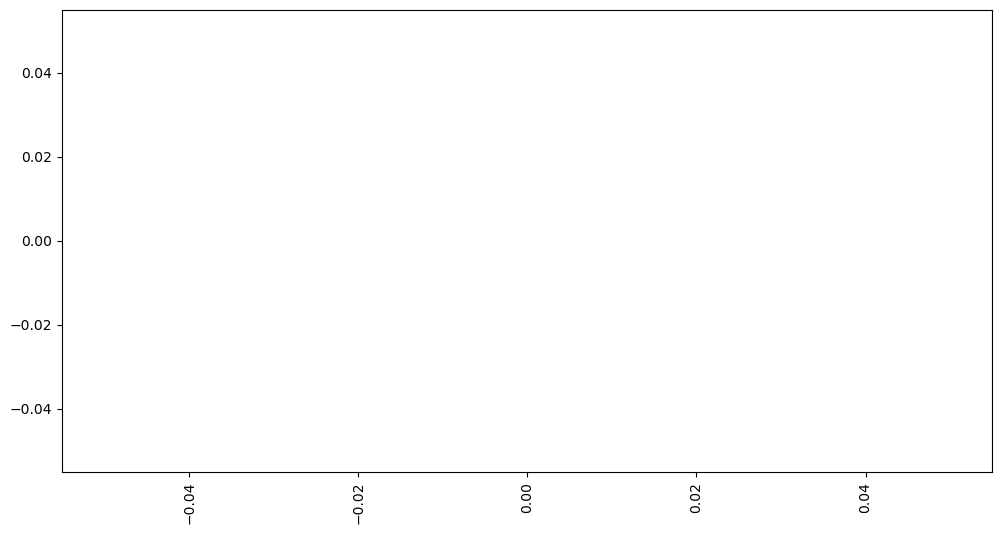

In [4]:
import matplotlib.pyplot as plt


missing_values = df.isnull().sum()
missing_cols = missing_values[missing_values > 0]

plt.figure(figsize=(12,6))
missing_cols.plot(kind='bar')
plt.title("Missing Values Count per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Mean / Median Imputation for Numerical Columns

In [5]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Impute missing values
for col in num_cols:
    if df[col].isnull().sum() > 0:
        if df[col].skew() < 1:
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

df[num_cols].isnull().sum()


Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [ ]:
# Mode Imputation for Categorical Columns

In [6]:

cat_cols = df.select_dtypes(include=['object']).columns


for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

df[cat_cols].isnull().sum()


Series([], dtype: float64)

In [ ]:
# Remove Columns with Extremely High Missing Values

In [7]:

missing_percentage = (missing_values / len(df)) * 100


cols_to_drop = missing_percentage[missing_percentage > 40].index


df.drop(columns=cols_to_drop, inplace=True)

cols_to_drop


Index([], dtype='object')

In [ ]:
# Validate Dataset After Cleaning

In [8]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [9]:

df.isnull().sum()


Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [ ]:
# Compare Before vs After Dataset Size & Quality

In [11]:

df_original = pd.read_csv(r"D:\Download\archive (2)/house_price_regression_dataset.csv")

print("Before Cleaning:")
print("Shape:", df_original.shape)
print("Total Missing Values:", df_original.isnull().sum().sum())

print("\nAfter Cleaning:")
print("Shape:", df.shape)
print("Total Missing Values:", df.isnull().sum().sum())


Before Cleaning:
Shape: (1000, 8)
Total Missing Values: 0

After Cleaning:
Shape: (1000, 8)
Total Missing Values: 0
